In [3]:
import os
from pathlib import Path

def change_image_extensions(directory, new_extension=".jpg"):
    img_extensions = [".jpeg", ".jpg", ".png", ".gif", ".bmp"]

    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        if os.path.isfile(filepath):
            file_extension = os.path.splitext(file)[-1].lower()

            if file_extension in img_extensions:
                new_file = os.path.splitext(file)[0] + new_extension
                new_filepath = os.path.join(directory, new_file)
                os.rename(filepath, new_filepath)
                print(f"{file} -> {new_file}")

if __name__ == "__main__":
    directory = "D:\\ex\\data\\before_pickup\\egg"
    change_image_extensions(directory)

003_003.jpeg -> 003_003.jpg
004_000.jpeg -> 004_000.jpg
004_001.jpeg -> 004_001.jpg
004_002.jpeg -> 004_002.jpg
005_000.jpeg -> 005_000.jpg
005_001.jpeg -> 005_001.jpg
005_002.jpeg -> 005_002.jpg
005_003.jpeg -> 005_003.jpg
005_004.jpeg -> 005_004.jpg
005_005.jpeg -> 005_005.jpg
006_000.jpeg -> 006_000.jpg
006_001.jpeg -> 006_001.jpg
006_002.jpeg -> 006_002.jpg
006_003.jpeg -> 006_003.jpg
006_004.jpeg -> 006_004.jpg
006_005.jpeg -> 006_005.jpg
006_006.jpeg -> 006_006.jpg
006_007.jpeg -> 006_007.jpg
012_000.jpeg -> 012_000.jpg
012_001.jpeg -> 012_001.jpg
012_002.jpeg -> 012_002.jpg
012_003.jpeg -> 012_003.jpg
012_004.jpeg -> 012_004.jpg
012_005.jpeg -> 012_005.jpg
012_006.jpeg -> 012_006.jpg
012_007.jpeg -> 012_007.jpg
012_008.jpeg -> 012_008.jpg
012_009.jpeg -> 012_009.jpg
012_010.jpeg -> 012_010.jpg
012_011.jpeg -> 012_011.jpg
012_012.jpeg -> 012_012.jpg
012_013.jpeg -> 012_013.jpg
012_014.jpeg -> 012_014.jpg
012_015.jpeg -> 012_015.jpg
012_016.jpeg -> 012_016.jpg
012_017.jpeg -> 012_

before pickupのアノテーションをするためcsvファイルの作成

In [5]:
import csv
import os
import re

# 画像フォルダのパス
image_folder_path = "D:\ex\data\\before_pickup\egg"

# CSVファイルのパス
csv_file_path = "D:\ex\data\\before_pickup\\annotation.csv"

# ファイル名を自然順序でソートするための関数
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split(r'(\d+)', s)]

# CSVファイルを新規作成して、各行に画像ファイル名を記述する
with open(csv_file_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['filename'])

    # ファイル名のリストを取得し、自然順序でソート
    filenames = [filename for filename in os.listdir(image_folder_path) if filename.endswith('.jpg') or filename.endswith('.png')]
    filenames.sort(key=natural_sort_key)

    # ソートされたファイル名のリストをCSVファイルに書き込む
    for filename in filenames:
        writer.writerow([filename])

In [4]:
import os
import shutil
import csv

source_dir = "D:\\ex\\data\\after_pickup\\yolo_trim_every10extracted\\all_images"
# source_dir = "D:\ex\data\\before_pickup\egg_and_egg_low_grade"
# target_dir = "D:\\ex\\data\\after_pickup\\yolo_trim_every10extracted\\egg"
target_dir = "D:\\ex\\data\\after_pickup\\yolo_trim_every10extracted\\invisible"

# target_dir = "D:\\ex\\data\\before_pickup\\egg"

annotation_file = "D:\\ex\\data\\after_pickup\\yolo_trim_every10extracted\\annotation.csv"
# annotation_file = "D:\\ex\\data\\before_pickup\\annotation.csv"


with open(annotation_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if len(row) < 2:  # Check if the row has at least two columns
            continue

        filename = row[0]
        label = row[1]

        if label == '3':
            source_filepath = os.path.join(source_dir, filename)
            target_filepath = os.path.join(target_dir, filename)

            if os.path.exists(source_filepath):
                shutil.copy(source_filepath, target_filepath)
                print(f"Copied {filename} to {target_dir}")

Copied 07290847_1_70_009.jpg to D:\ex\data\after_pickup\yolo_trim_every10extracted\invisible
Copied 07290847_1_70_019.jpg to D:\ex\data\after_pickup\yolo_trim_every10extracted\invisible
Copied 07290847_1_70_029.jpg to D:\ex\data\after_pickup\yolo_trim_every10extracted\invisible
Copied 07290847_1_70_039.jpg to D:\ex\data\after_pickup\yolo_trim_every10extracted\invisible
Copied 07290847_1_70_049.jpg to D:\ex\data\after_pickup\yolo_trim_every10extracted\invisible
Copied 07290847_1_70_059.jpg to D:\ex\data\after_pickup\yolo_trim_every10extracted\invisible
Copied 07290847_1_70_069.jpg to D:\ex\data\after_pickup\yolo_trim_every10extracted\invisible
Copied 07290847_1_70_079.jpg to D:\ex\data\after_pickup\yolo_trim_every10extracted\invisible
Copied 07290847_1_70_089.jpg to D:\ex\data\after_pickup\yolo_trim_every10extracted\invisible
Copied 07290847_1_70_099.jpg to D:\ex\data\after_pickup\yolo_trim_every10extracted\invisible
Copied 07290847_1_70_109.jpg to D:\ex\data\after_pickup\yolo_trim_ever

In [3]:
import cv2
import os
import numpy as np

source_dir = "D:\\ex\\data\\after_pickup\\yolo_trim_every10extracted\\all_images"
output_dir = "D:\\ex\\data\\after_pickup\\yolo_trim_every10extracted\\all_images_enhanced"

# ディレクトリ内のすべての画像ファイルを取得
image_files = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# 明るさとコントラストを調整する関数
def adjust_brightness_contrast(image, alpha, beta):
    return cv2.addWeighted(image, alpha, image, 0, beta)

# 画像の平均明るさを計算する関数
def calculate_brightness(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return np.mean(hsv_image[:, :, 2])

# 画像の明るさとコントラストを調整し、新しいディレクトリに保存
for image_file in image_files:
    # 画像を読み込む
    image_path = os.path.join(source_dir, image_file)
    image = cv2.imread(image_path)

    # 画像の明るさを計算
    brightness = calculate_brightness(image)

    # 明るさの閾値を設定
    brightness_threshold = 120

    if brightness < brightness_threshold:
        # 明るさとコントラストを調整（alpha: コントラスト、beta: 明るさ）
        alpha = 1.5
        beta = 50
        enhanced_image = adjust_brightness_contrast(image, alpha, beta)

        # 調整後の画像を保存
        output_path = os.path.join(output_dir, image_file)
        cv2.imwrite(output_path, enhanced_image)
    else:
        # 明るい画像はそのまま保存
        output_path = os.path.join(output_dir, image_file)
        cv2.imwrite(output_path, image)


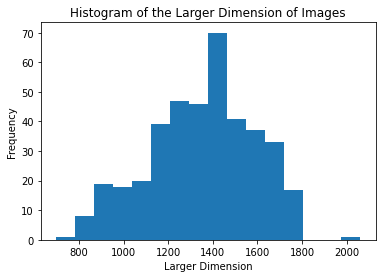

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

directories = [
    "D:\\ex\\data\\before_pickup\\egg",
    "D:\\ex\\data\\before_pickup\\invisible",
    "D:\\ex\\data\\after_pickup\\yolo_trim_every10extracted\\egg",
    "D:\\ex\\data\\after_pickup\\yolo_trim_every10extracted\\invisible"
]

# 画像ファイルの拡張子
extensions = ('.jpg', '.png', '.jpeg')

# 画像の最大の縦横幅をリストに格納
max_dims = []

for directory in directories:
    for file in os.listdir(directory):
        if file.lower().endswith(extensions):
            image_path = os.path.join(directory, file)
            with Image.open(image_path) as img:
                width, height = img.size
                max_dims.append(max(width, height))

# ヒストグラムを描画
plt.hist(max_dims, bins='auto')
plt.title("Histogram of the Larger Dimension of Images")
plt.xlabel("Larger Dimension")
plt.ylabel("Frequency")
plt.show()

In [9]:
import os
import random
from PIL import Image

directories = [
    "D:\\ex\\data\\before_pickup\\egg",
    "D:\\ex\\data\\before_pickup\\invisible",
    "D:\\ex\\data\\after_pickup\\yolo_trim_every10extracted\\egg",
    "D:\\ex\\data\\after_pickup\\yolo_trim_every10extracted\\invisible"
]

# 画像ファイルの拡張子
extensions = ('.jpg', '.png', '.jpeg')

def make_square(image_path, output_path):
    with Image.open(image_path).convert("L") as img: # グレースケール変換
        width, height = img.size

        # リサイズが必要な場合
        if max(width, height) > 1800:
            aspect_ratio = float(width) / float(height)
            if width > height:
                new_width = 1800
                new_height = int(1800 / aspect_ratio)
            else:
                new_height = 1800
                new_width = int(1800 * aspect_ratio)
            img = img.resize((new_width, new_height), Image.ANTIALIAS)

        width, height = img.size
        new_img = Image.new("L", (1800, 1800), 255) # グレースケールで背景色は白

        offset_x = random.randint(0, 1800 - width)
        offset_y = random.randint(0, 1800 - height)

        new_img.paste(img, (offset_x, offset_y))
        new_img.save(output_path)

output_base = "D:\\ex\\data\\squared1800_unformated"
os.makedirs(output_base, exist_ok=True)

for directory in directories:
    subdir_name = os.path.basename(directory)
    output_dir = os.path.join(output_base, subdir_name)
    os.makedirs(output_dir, exist_ok=True)

    for file in os.listdir(directory):
        if file.lower().endswith(extensions):
            image_path = os.path.join(directory, file)
            output_path = os.path.join(output_dir, file)
            make_square(image_path, output_path)


C:\Users\takashi\AppData\Local\Temp\ipykernel_22960\1836956452.py:28: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((new_width, new_height), Image.ANTIALIAS)


In [13]:
import os
import shutil
from collections import defaultdict

source_dir = "D:/ex/data/squared1800_unformated/egg"
dest_dir = "D:/ex/data/squared1800/egg"

if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

files = os.listdir(source_dir)
individuals = defaultdict(int)

for file in files:
    if len(file) == 11:
        id = file[:3]
    else:
        id = file.split("_")[:2]
        id = "".join(id)

    individuals[id] += 1

individual_id_mapping = {}
for idx, individual in enumerate(sorted(individuals.keys())):
    individual_id_mapping[individual] = f"{idx + 1:03d}"

image_count = defaultdict(int)

for file in files:
    if len(file) == 11:
        id = file[:3]
    else:
        id = file.split("_")[:2]
        id = "".join(id)

    individual_id = individual_id_mapping[id]
    image_count[individual_id] += 1
    new_filename = f"{individual_id}_{image_count[individual_id]:03d}.jpg"

    source_path = os.path.join(source_dir, file)
    dest_path = os.path.join(dest_dir, new_filename)
    shutil.copyfile(source_path, dest_path)

print("コピーが完了しました。")

コピーが完了しました。


In [14]:
import os
import shutil
from collections import defaultdict

def copy_and_rename_files(source_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    files = os.listdir(source_dir)
    individuals = defaultdict(int)

    for file in files:
        if len(file) == 11:
            id = file[:3]
        else:
            id = file.split("_")[:2]
            id = "".join(id)

        individuals[id] += 1

    individual_id_mapping = {}
    for idx, individual in enumerate(sorted(individuals.keys())):
        individual_id_mapping[individual] = f"{idx + 1:03d}"

    image_count = defaultdict(int)

    for file in files:
        if len(file) == 11:
            id = file[:3]
        else:
            id = file.split("_")[:2]
            id = "".join(id)

        individual_id = individual_id_mapping[id]
        image_count[individual_id] += 1
        new_filename = f"{individual_id}_{image_count[individual_id]:03d}.jpg"

        source_path = os.path.join(source_dir, file)
        dest_path = os.path.join(dest_dir, new_filename)
        shutil.copyfile(source_path, dest_path)

source_dir1 = "D:/ex/data/squared1800_unformated/egg"
dest_dir1 = "D:/ex/data/squared1800/egg"

source_dir2 = "D:/ex/data/squared1800_unformated/invisible"
dest_dir2 = "D:/ex/data/squared1800/invisible"

copy_and_rename_files(source_dir1, dest_dir1)
copy_and_rename_files(source_dir2, dest_dir2)

print("コピーが完了しました。")

コピーが完了しました。


k-fold

In [15]:
import os
import shutil
import random
from collections import defaultdict

def create_folders(path):
    if not os.path.exists(path):
        os.makedirs(path)

# データの場所
visible_path = r"D:\ex\data\squared1800\egg"
invisible_path = r"D:\ex\data\squared1800\invisible"

# 分割後のデータを保存するフォルダのパス
output_base_path = r"D:\ex\data\squared1800\kfold"

# クラス数2 クラス名：visible・invisible
classes = ["visible", "invisible"]

# 個体番号をもとに分割
def split_by_individual_number(class_path):
    individual_numbers = defaultdict(list)
    
    for img_name in os.listdir(class_path):
        individual_number = img_name[:3]
        individual_numbers[individual_number].append(os.path.join(class_path, img_name))
    
    return individual_numbers

visible_individuals = split_by_individual_number(visible_path)
invisible_individuals = split_by_individual_number(invisible_path)

# 個体番号をシャッフル
visible_individual_keys = list(visible_individuals.keys())
invisible_individual_keys = list(invisible_individuals.keys())
random.shuffle(visible_individual_keys)
random.shuffle(invisible_individual_keys)

# 各クラスの個体番号をK分割
k = 5
visible_splits = [visible_individual_keys[i::k] for i in range(k)]
invisible_splits = [invisible_individual_keys[i::k] for i in range(k)]

# K分割交差検証用のフォルダ作成
for i in range(k):
    train_base_path = os.path.join(output_base_path, f"train_{i + 1}")
    test_base_path = os.path.join(output_base_path, f"test_{i + 1}")
    
    for class_name in classes:
        create_folders(os.path.join(train_base_path, class_name))
        create_folders(os.path.join(test_base_path, class_name))
    
    # 各クラスの個体番号をトレーニング/テスト用フォルダにコピー
    for j in range(k):
        if j == i:
            base_path = test_base_path
        else:
            base_path = train_base_path
        
        for individual_number in visible_splits[j]:
            for img_path in visible_individuals[individual_number]:
                shutil.copy(img_path, os.path.join(base_path, "visible"))
        
        for individual_number in invisible_splits[j]:
            for img_path in invisible_individuals[individual_number]:
                shutil.copy(img_path, os.path.join(base_path, "invisible"))

In [18]:
import os
import shutil
from collections import defaultdict
from itertools import cycle

def count_images_per_individual(input_path):
    image_count = defaultdict(int)
    for filename in os.listdir(input_path):
        individual_id = filename[:3]
        image_count[individual_id] += 1
    return image_count

def split_data(input_path, output_path, num_splits, cls):
    image_count = count_images_per_individual(input_path)
    sorted_individuals = sorted(image_count.items(), key=lambda x: x[1], reverse=True)
    
    split_assignments = defaultdict(list)
    split_cycle = cycle(range(1, num_splits + 1))
    
    for individual_id, count in sorted_individuals:
        current_split = next(split_cycle)
        split_assignments[current_split].append(individual_id)
    
    for split, individual_ids in split_assignments.items():
        split_dir = os.path.join(output_path, f'split_{split}', cls)
        os.makedirs(split_dir, exist_ok=True)
        for individual_id in individual_ids:
            for filename in os.listdir(input_path):
                if filename.startswith(individual_id):
                    src = os.path.join(input_path, filename)
                    dst = os.path.join(split_dir, filename)
                    shutil.copy(src, dst)

def main():
    num_splits = 5
    base_input_path = 'D:\\ex\\data\\squared1800'
    base_output_path = 'D:\ex\data\squared1800\\fold5ya'
    
    for cls in ['visible', 'invisible']:
        input_path = os.path.join(base_input_path, cls)
        output_path = base_output_path
        split_data(input_path, output_path, num_splits, cls)

if __name__ == '__main__':
    main()

In [19]:
import os
import shutil

def create_fold_directories(num_folds, base_path):
    for i in range(1, num_folds + 1):
        fold_dir = os.path.join(base_path, f'fold{i}')
        for dataset in ['train', 'test']:
            for cls in ['visible', 'invisible']:
                path = os.path.join(fold_dir, dataset, cls)
                os.makedirs(path, exist_ok=True)

def copy_split_data_to_folds(num_folds, base_path):
    for test_fold in range(1, num_folds + 1):
        fold_dir = os.path.join(base_path, f'fold{test_fold}')
        
        for split in range(1, num_folds + 1):
            split_dir = os.path.join(base_path, f'split{split}')
            
            if split == test_fold:
                dataset = 'test'
            else:
                dataset = 'train'
                
            for cls in ['visible', 'invisible']:
                src = os.path.join(split_dir, cls)
                dst = os.path.join(fold_dir, dataset, cls)
                
                for filename in os.listdir(src):
                    src_file = os.path.join(src, filename)
                    dst_file = os.path.join(dst, filename)
                    shutil.copy(src_file, dst_file)

def main():
    num_folds = 5
    base_path = 'D:\\ex\\data\\squared1800\\kfold'
    
    create_fold_directories(num_folds, base_path)
    copy_split_data_to_folds(num_folds, base_path)

if __name__ == '__main__':
    main()

中心トリミングプロジェクト

In [3]:
import os
import cv2
import numpy as np

def trim_images(input_dir, annotation_dir, output_dir, visualize_dir, trim_size=256):
    # output_dirとvisualize_dirが存在しない場合は作成
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    if not os.path.exists(visualize_dir):
        os.makedirs(visualize_dir)

    # input_dirから画像ファイルを取得
    for image_filename in os.listdir(input_dir):
        image_path = os.path.join(input_dir, image_filename)
        annotation_path = os.path.join(annotation_dir, os.path.splitext(image_filename)[0] + ".txt")
        output_path = os.path.join(output_dir, image_filename)
        visualize_path = os.path.join(visualize_dir, image_filename)

        # 画像とアノテーションを読み込む (グレースケールで読み込み)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        with open(annotation_path, 'r') as f:
            annotation = f.readline().split()
            x_center = float(annotation[1])
            y_center = float(annotation[2])

        # 画像のサイズを取得
        h, w = img.shape

        # センター座標をピクセル値に変換
        x_pixel = int(x_center * w)
        y_pixel = int(y_center * h)

        # トリミング範囲を計算
        x_start = x_pixel - trim_size // 2
        x_end = x_pixel + trim_size // 2
        y_start = y_pixel - trim_size // 2
        y_end = y_pixel + trim_size // 2

        # トリミング範囲が画像外に出る場合の処理
        padded_img = np.zeros((h + trim_size, w + trim_size), dtype=np.uint8)
        padded_img[trim_size // 2:trim_size // 2 + h, trim_size // 2:trim_size // 2 + w] = img

        # 画像をトリミング
        cropped_img = padded_img[y_start + trim_size // 2:y_end + trim_size // 2, x_start + trim_size // 2:x_end + trim_size // 2]

        # トリミングされた画像を保存 (グレースケールで保存)
        cv2.imwrite(output_path, cropped_img)

        # トリミング位置を可視化 (BGRで読み込み)
        img_bgr = cv2.imread(image_path)
        cv2.rectangle(img_bgr, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)

        # 可視化された画像を保存
        cv2.imwrite(visualize_path, img_bgr)

# ディレクトリのパスを定義
input_dir = "D:\\ex\\data\\rectangle\\invisible"
annotation_dir = "D:\\ex\\data\\rectangle\\invisible_center_annotation"
output_dir = "D:\ex\data\\rectangle\\invisible_trim"
visualize_dir = "D:\ex\data\\rectangle\\invisible_trim_visualize"

# 関数を呼び出して画像をトリミング
trim_images(input_dir, annotation_dir, output_dir, visualize_dir, trim_size=256)


